## Standard imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Creating our model

In [2]:

class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
model = Model()

## Load the iris dataset

In [4]:
df = pd.read_csv("iris.csv")

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
X = df.drop('target', axis=1)
y = df['target']

In [7]:
type(X)

pandas.core.frame.DataFrame

.values will convert it to numpy array and we convert this into array so that we don't get an error when converting this to a tensor after spliting into training and testing.

In [8]:

X = X.values
y = y.values
type(X)

numpy.ndarray

## Performing Train/Test/Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=33)

In [11]:
X_train

array([[5.6, 2.7, 4.2, 1.3],
       [6.7, 3.1, 4.7, 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [6.4, 3.2, 5.3, 2.3],
       [6.7, 3.1, 5.6, 2.4],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5. , 2.3, 3.3, 1. ],
       [4.9, 3.1, 1.5, 0.1],
       [6.3, 2.3, 4.4, 1.3],
       [5.8, 2.6, 4. , 1.2],
       [6.2, 2.9, 4.3, 1.3],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.1, 2.5, 3. , 1.1],
       [4.8, 3.4, 1.6, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.4, 1.5, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.5, 3. , 5.5, 1.8],
       [5.4, 3.9, 1.7, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [5.8, 2.8, 5.1, 2.4],
       [7.7, 2.6, 6.9, 2.3],
       [5.5, 2.5, 4. , 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [4.5, 2.3, 1.3, 0.3],
       [6.3, 2.8, 5.1, 1.5],
       [4.4, 2.9, 1.4, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [6. , 3

In [12]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

We will use "CrossEntropyLoss()" so that we don't have to worry about one hot encoding as our targets are 0 , 1  and 2 so we don't have to worry about that "CrossEntropyLoss()" will take care of that. 

In [14]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)

In [15]:
epochs = 100

losses = []

for i in range(epochs):

    # forward and get prediction
    y_pred = model(X_train)

    # Calculating loss or error
    loss = criterion(y_pred,y_train)

    losses.append(loss)

    if i%10==0:
        print(f"Epochs {i} and loss is {loss}")

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epochs 0 and loss is 1.1507114171981812
Epochs 10 and loss is 0.9377315640449524
Epochs 20 and loss is 0.7798256278038025
Epochs 30 and loss is 0.6099399924278259
Epochs 40 and loss is 0.40079933404922485
Epochs 50 and loss is 0.25436317920684814
Epochs 60 and loss is 0.15053053200244904
Epochs 70 and loss is 0.10086944699287415
Epochs 80 and loss is 0.08128314465284348
Epochs 90 and loss is 0.07231427729129791


Our model is trained so now lets test our model

In [16]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

Basically the torch.no_grad turn of the gradients for the testing because we don't want to do back propegation and only cheking our model performance on test data.

In [17]:
loss

tensor(0.0581)

Our model actually perform good on test data

In [18]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-2.1252,  4.8064, -0.8628])     1
 2. tensor([-1.7985,  5.3098, -1.5449])     1
 3. tensor([  6.3542,   0.8438, -10.0541])  0
 4. tensor([-3.9123,  4.5958,  1.1693])     1
 5. tensor([-7.4713,  3.2021,  5.7853])     2
 6. tensor([-10.4976,   1.6459,   9.6297])  2
 7. tensor([  6.3201,   0.9917, -10.1532])  0
 8. tensor([  7.0468,   0.7059, -10.9137])  0
 9. tensor([-7.2061,  3.3477,  5.3565])     2
10. tensor([-9.3960,  2.5759,  8.1033])     2
11. tensor([-9.8808,  2.3475,  8.7141])     2
12. tensor([ 6.2748,  0.6655, -9.7613])     0
13. tensor([-9.3142,  2.1880,  8.1947])     2
14. tensor([-3.7803,  4.5050,  1.0752])     1
15. tensor([-7.8657,  3.0117,  6.2303])     2
16. tensor([-1.8867,  5.1572, -1.3345])     1
17. tensor([-5.7006,  3.5030,  3.6696])     2
18. tensor([  7.1789,   0.7369, -11.1350])  0
19. tensor([-3.2944,  4.7931,  0.3475])     1
20. tensor([-7.7665,  3.7629,  5.7095])     2
21. tensor([  6.6499,   0.7889, -10.4252])  0
22. tensor([  7.4357,   0.8918, -1

Here we can see our model have 100% accuracy it got 30 out 30 correct, So now lets save our model.

In [19]:
torch.save(model.state_dict(), 'My_iris_model.pt')

Our model is save now lets now lets again load this model

In [37]:
new_model = Model()
new_model.load_state_dict(torch.load('My_iris_model.pt'))

<All keys matched successfully>

In [38]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

Our new model is loaded now lets try our model on unseen data and see how it performe.


In [39]:
mystery_iris = torch.tensor([5,3,2,0.5])

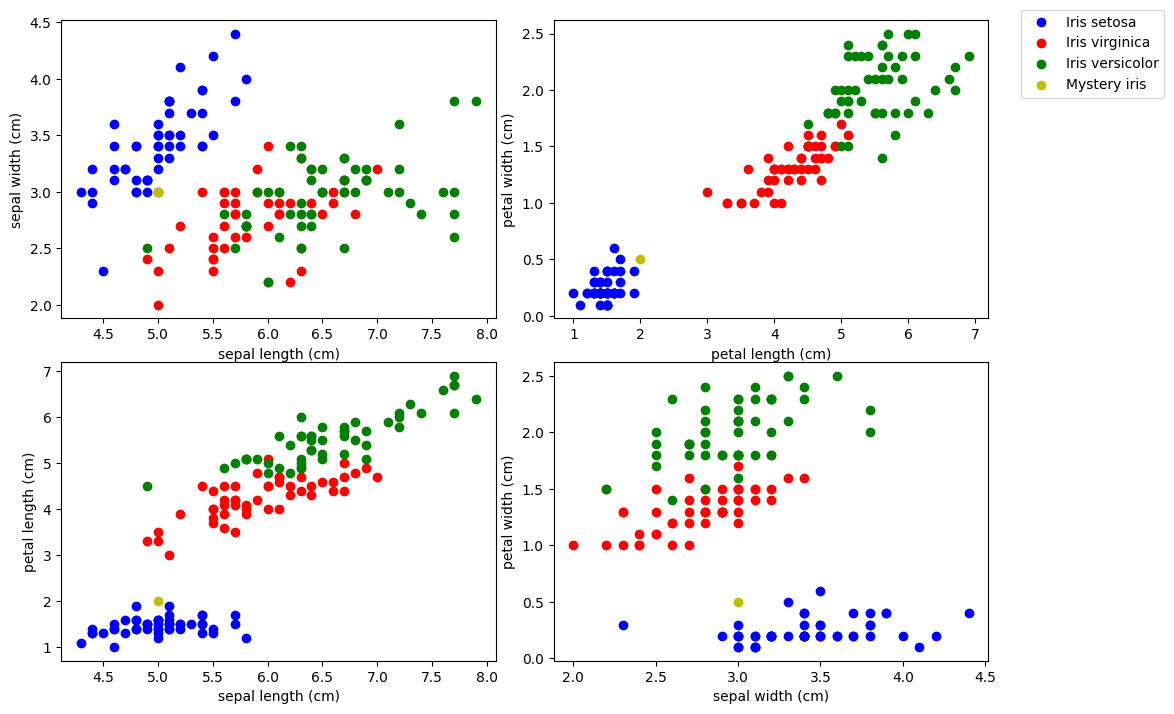

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In Visualization we can our model should be iris setosa so lets test it with our model, Our model should predict '0' because that is the target variable for iris setosa

In [42]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(new_model(mystery_iris).argmax())
    print(labels[new_model(mystery_iris).argmax()])

tensor([ 4.7038,  1.7186, -8.2448])

tensor(0)
Iris setosa


So our model prediction is right as we can in the visualization our 'mystery_iris' was lying in 'iris setosa' and our model have also predicted that it is 'Iris setosa'.